### **Auto MPG Analysis using PCA and tSNE**

#### **Importing the necessary libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
# Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#importing warnings
import warnings
warnings.filterwarnings("ignore")

#### **Loading the data**

In [2]:
data = pd.read_csv("auto-mpg.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


#### **Checking the info of the data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


#### **Data Preprocessing and Exploratory Data Analysis**

##### **Checking the unique values in the 'car name' column**

In [5]:
data["car name"].nunique()

305

In [6]:
# Creating copy of the data so that we don't lose the original data
data1 = data.copy()

# Dropping the column 'car name'
data = data.drop(['car name'], axis = 1)

#### **Checking values in the horsepower column**

In [9]:
# Checking if there are values other than digits in the column 'horsepower'

hpIsDigit = pd.DataFrame(data.horsepower.str.isdigit())  # If the string consists of digits return True else False
data[hpIsDigit['horsepower'] == False]  # Taking only those rows where horsepower is not a digit

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [37]:
# Replacing ? with np.nan
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,groups
32,25.0,4,98.0,93.5,2046,19.0,71,group_1
126,21.0,6,200.0,93.5,2875,17.0,74,group_2
330,40.9,4,85.0,93.5,1835,17.3,80,group_1
336,23.6,4,140.0,93.5,2905,14.3,80,group_1
354,34.5,4,100.0,93.5,2320,15.8,81,group_1
374,23.0,4,151.0,93.5,3035,20.5,82,group_1


In [11]:
# Imputing the missing values with the median value of the column horsepower
data.horsepower.fillna(data.horsepower.median(), inplace = True)
data['horsepower'] = data['horsepower'].astype('float64')  # Converting the horsepower column from object data type to float

#### **Summary Statistics**

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


#### **Let's check the distribution and outliers for each column in the data**

mpg
Skew : 0.46


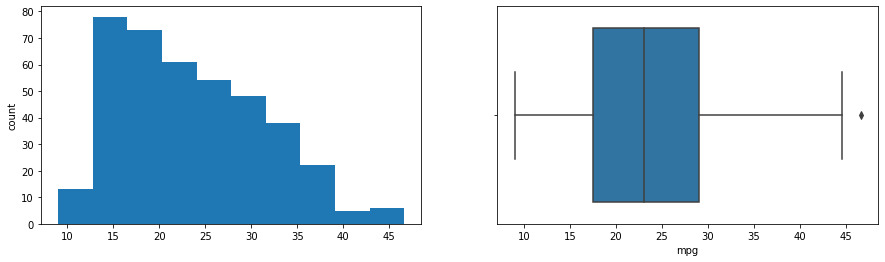

cylinders
Skew : 0.53


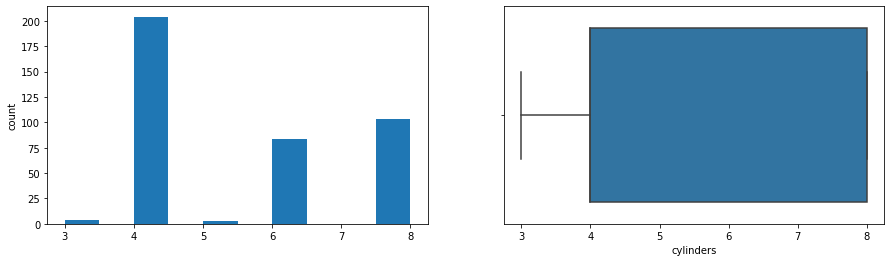

displacement
Skew : 0.72


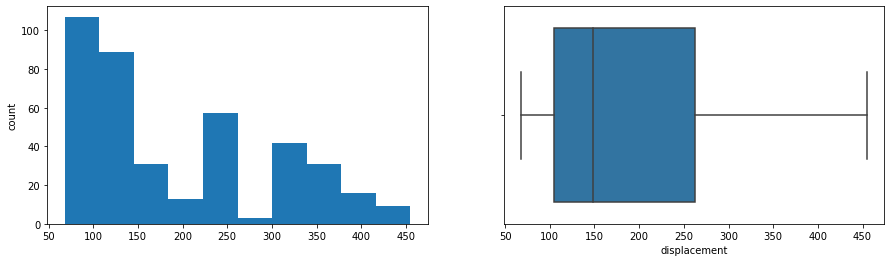

horsepower
Skew : 1.11


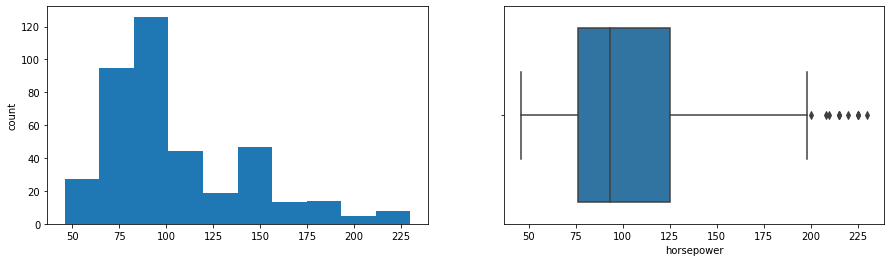

weight
Skew : 0.53


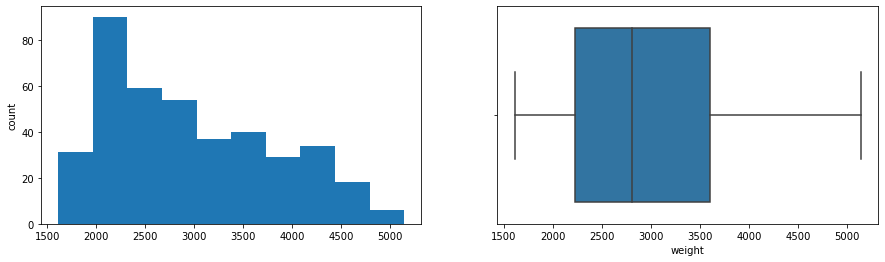

acceleration
Skew : 0.28


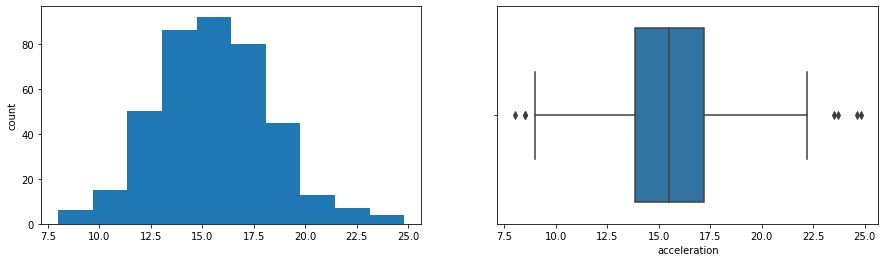

model year
Skew : 0.01


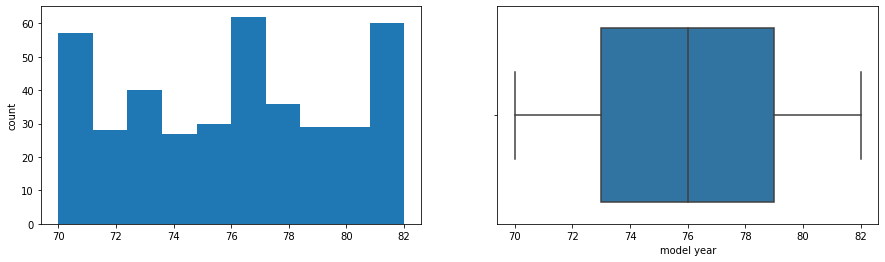

In [13]:
# Plotting histogram and boxplot to see the distribuiton and outliers in the data.

for col in data.columns:
    print(col)
    print('Skew :', round(data[col].skew(), 2))    
    plt.figure(figsize = (15, 4))    
    plt.subplot(1, 2, 1)    
    data[col].hist(bins=10, grid=False)   
    plt.ylabel('count')   
    plt.subplot(1, 2, 2)    
    sns.boxplot(x = data[col])   
    plt.show()

**Observations:**
   1.The obesrvation from the graph shows that mpg and horsepower are moderately right-skewed. The boxplot shows that these variable has outliers towards the right.
   2.Displacement, and weight are moderately right-skewed. However, their respective boxplot does not show any outliers.
   3.Variable accelaration is closely a normal distributin with some outliers in both right and left.


### **Checking the correlation**

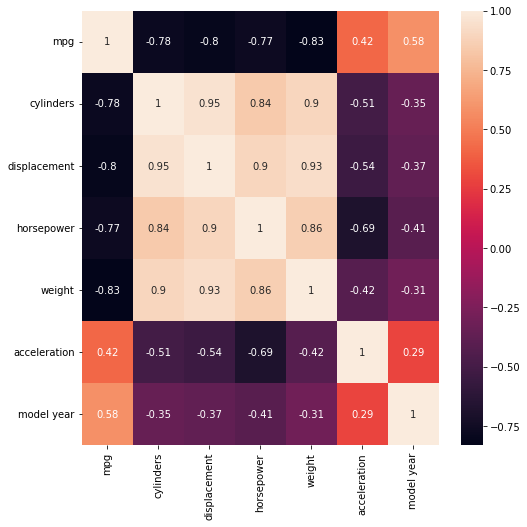

In [14]:
plt.figure(figsize = (8, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:**
- The variable mpg has a strong negative correlation with cylinders, displacement, horsepower, and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has a strong positive correlation with horsepower, displacement, and cylinders.
- model year is positively correlated with mpg.

### **Scaling the data**

In [15]:
# Scaling the data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [16]:
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


## **Principal Component Analysis**

In [17]:
# Defining the number of principal components to generate 
n = data_scaled.shape[1]
# Finding principal components for the data
pca = PCA(n_components = n, random_state=1)  # Applying the PCA algorithm with random_state = 1
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))   # Fitting and transforming the pca function on scaled data
# The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [18]:
#observing data_pca1 dataframe
data_pca1

,0,1,2,3,4,5,6
0,2.661556,0.918577,-0.558420,0.740000,-0.549433,-0.089079,-0.118566
1,3.523307,0.789779,-0.670658,0.493223,-0.025134,0.203588,0.101518
2,2.998309,0.861604,-0.982108,0.715598,-0.281324,0.137351,-0.055167
3,2.937560,0.949168,-0.607196,0.531084,-0.272607,0.295916,-0.121296
4,2.930688,0.931822,-1.078890,0.558607,-0.543871,0.007707,-0.167301
...,...,...,...,...,...,...,...
393,-1.420970,-1.225252,-0.286402,-0.671666,0.054472,-0.187878,0.101922
394,-4.094686,-1.279998,1.960384,1.375464,0.740606,0.175097,0.087391
395,-1.547254,-1.252540,-1.906999,-0.323768,-0.255922,-0.254531,0.149028
396,-2.022942,-1.132137,0.609384,-0.464327,0.186656,0.089169,0.075018


In [19]:
#observing components of pca
pca.components_

array([[-0.39773741,  0.41648508,  0.42971252,  0.42231052,  0.41422422,
        -0.28482815, -0.22942827],
       [-0.21142965, -0.19161162, -0.17742755, -0.09032688, -0.22195569,
         0.0241102 , -0.91054785],
       [-0.25657907,  0.14078607,  0.10364893, -0.16806374,  0.2796679 ,
         0.89264543, -0.01810927],
       [ 0.74906011,  0.48310136,  0.29347376, -0.03444054, -0.11312666,
         0.12794202, -0.29839943],
       [ 0.33155628, -0.48484764, -0.06193851,  0.7262367 ,  0.24412426,
         0.23742238, -0.08815347],
       [-0.22861063,  0.34221444, -0.14610286,  0.50262055, -0.70147832,
         0.2144526 ,  0.13634971],
       [-0.08936552, -0.42945264,  0.81351966, -0.06337309, -0.36942347,
         0.0524147 ,  0.05032739]])

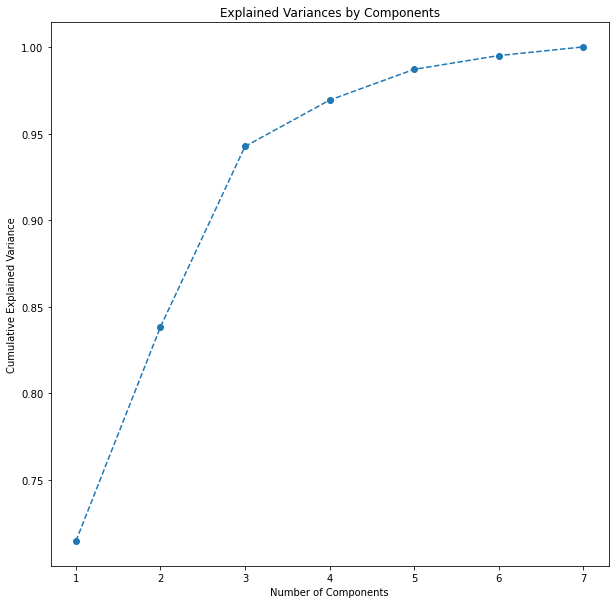

In [20]:
# Visualizing the explained variance by individual components
plt.figure(figsize = (10, 10))
plt.plot(range(1, 8), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [21]:
# Finding the least number of components that can explain more than 90% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.90):
        print("Number of PCs that explain at least 90% variance: ", ix + 1)
        break

Number of PCs that explain at least 90% variance:  3


**Observations:**
From the PCA curve we notice that around 90% of the variance explained by the first three component of PCA. Therefore, instead of 7 component, we can use 3 and still measure almost the same variance.

In [22]:
#observing first three components

pc_comps = ['PC1', 'PC2', 'PC3']
data_pca = pd.DataFrame(np.round(pca.components_[:3,:], 2), index = pc_comps, columns = data_scaled.columns)
data_pca.T

,PC1,PC2,PC3
mpg,-0.40,-0.21,-0.26
cylinders,0.42,-0.19,0.14
displacement,0.43,-0.18,0.10
horsepower,0.42,-0.09,-0.17
weight,0.41,-0.22,0.28
acceleration,-0.28,0.02,0.89
model year,-0.23,-0.91,-0.02


In [23]:
def color_high(val):
    if val <= -0.40:
        return 'background: pink'    
    elif val >= 0.40:
        return 'background: skyblue'       
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3
mpg,-0.400000,-0.210000,-0.260000
cylinders,0.420000,-0.190000,0.140000
displacement,0.430000,-0.180000,0.100000
horsepower,0.420000,-0.090000,-0.170000
weight,0.410000,-0.220000,0.280000
acceleration,-0.280000,0.020000,0.890000
model year,-0.230000,-0.910000,-0.020000


**Observations:** 
The first component, PC1, seems to be related to mpg, cylinders, diplacement, horsepower, and weight. While the 2nd principal component, PC2, related to model year, the third one, PC3, seems to be capturing the feature, accelaration.

#### We can also visualize the data in 2 dimensions using the first two principal components 

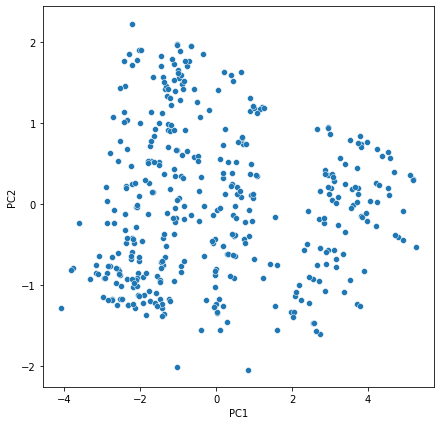

In [24]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = data_pca1[0], y = data_pca1[1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Let's try adding hue to the scatter plot**

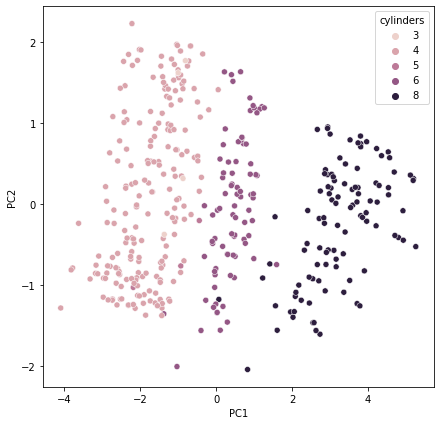

In [25]:
df_concat = pd.concat([data_pca1, data], axis = 1)
plt.figure(figsize = (7, 7))
sns.scatterplot(x = df_concat[0], y= df_concat[1], hue=df_concat['cylinders'])   # Creating a scatter plot with x = 0 and y = 1 using df_concat dataframe
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

**Observations:** 
From the above scatterplot, we notice that there is three distinct group for the combination of PC1, PC2, and cylinders. All the values of PC2 relates with almost all cylinders while in case of PC1, different cylinder number has different values.

## t-SNE

**Let's see performance of t-SNE**

**Applying the t-SNE embedding with 2 components for the DataFrame 'data_scaled' (using random_state = 1)**  

In [26]:
tsne = TSNE(n_components=2, random_state=1)          # Applying the t-SNE algorithm with random_state = 1
data_tsne = tsne.fit_transform(data_scaled)    # Fitting and transforming t-SNE function on the scaled data

In [27]:
data_tsne.shape

(398, 2)

In [28]:
data_tsne = pd.DataFrame(data = data_tsne, columns = ['Component 1', 'Component 2'])

In [29]:
data_tsne.head()

,Component 1,Component 2
0,-23.104227,-30.228313
1,-24.950542,-29.500071
2,-24.119961,-30.136980
3,-23.673611,-29.754570
4,-23.841228,-30.443615


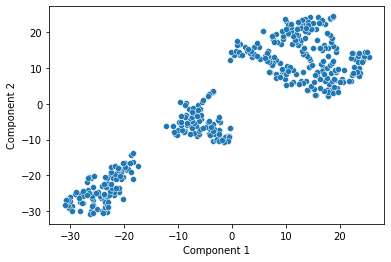

In [30]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1])
plt.show()

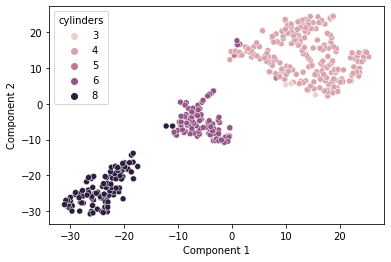

In [31]:
# Let's see the scatter plot of the data w.r.t number of cylinders
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data.cylinders)
plt.show()

**Observations:**
From the above plot, we observe that there are three distinct groups. Though there are slight overlapping of the data based on number of cylinders, t-SNE does very well to segment the data into groups.

In [32]:
# Let's assign points to 3 different groups
def grouping(x):
    first_component = x['Component 1']   
    second_component = x['Component 2']  
    if (first_component > 0) and (second_component > -5): 
        return 'group_1'    
    if (first_component > -20 ) and (first_component < 5):
        return 'group_2'  
    else: 
        return 'group_3'

In [33]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

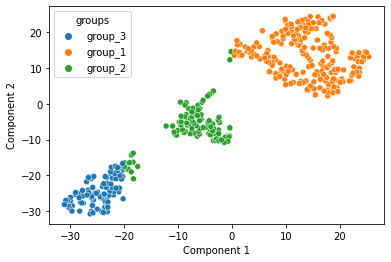

In [34]:
sns.scatterplot(x = data_tsne.iloc[:,0], y = data_tsne.iloc[:,1], hue = data_tsne.iloc[:,2])

plt.show()

In [35]:
data['groups'] = data_tsne['groups']

**Let's plot a Boxplot for all the columns of data with regards to groups**

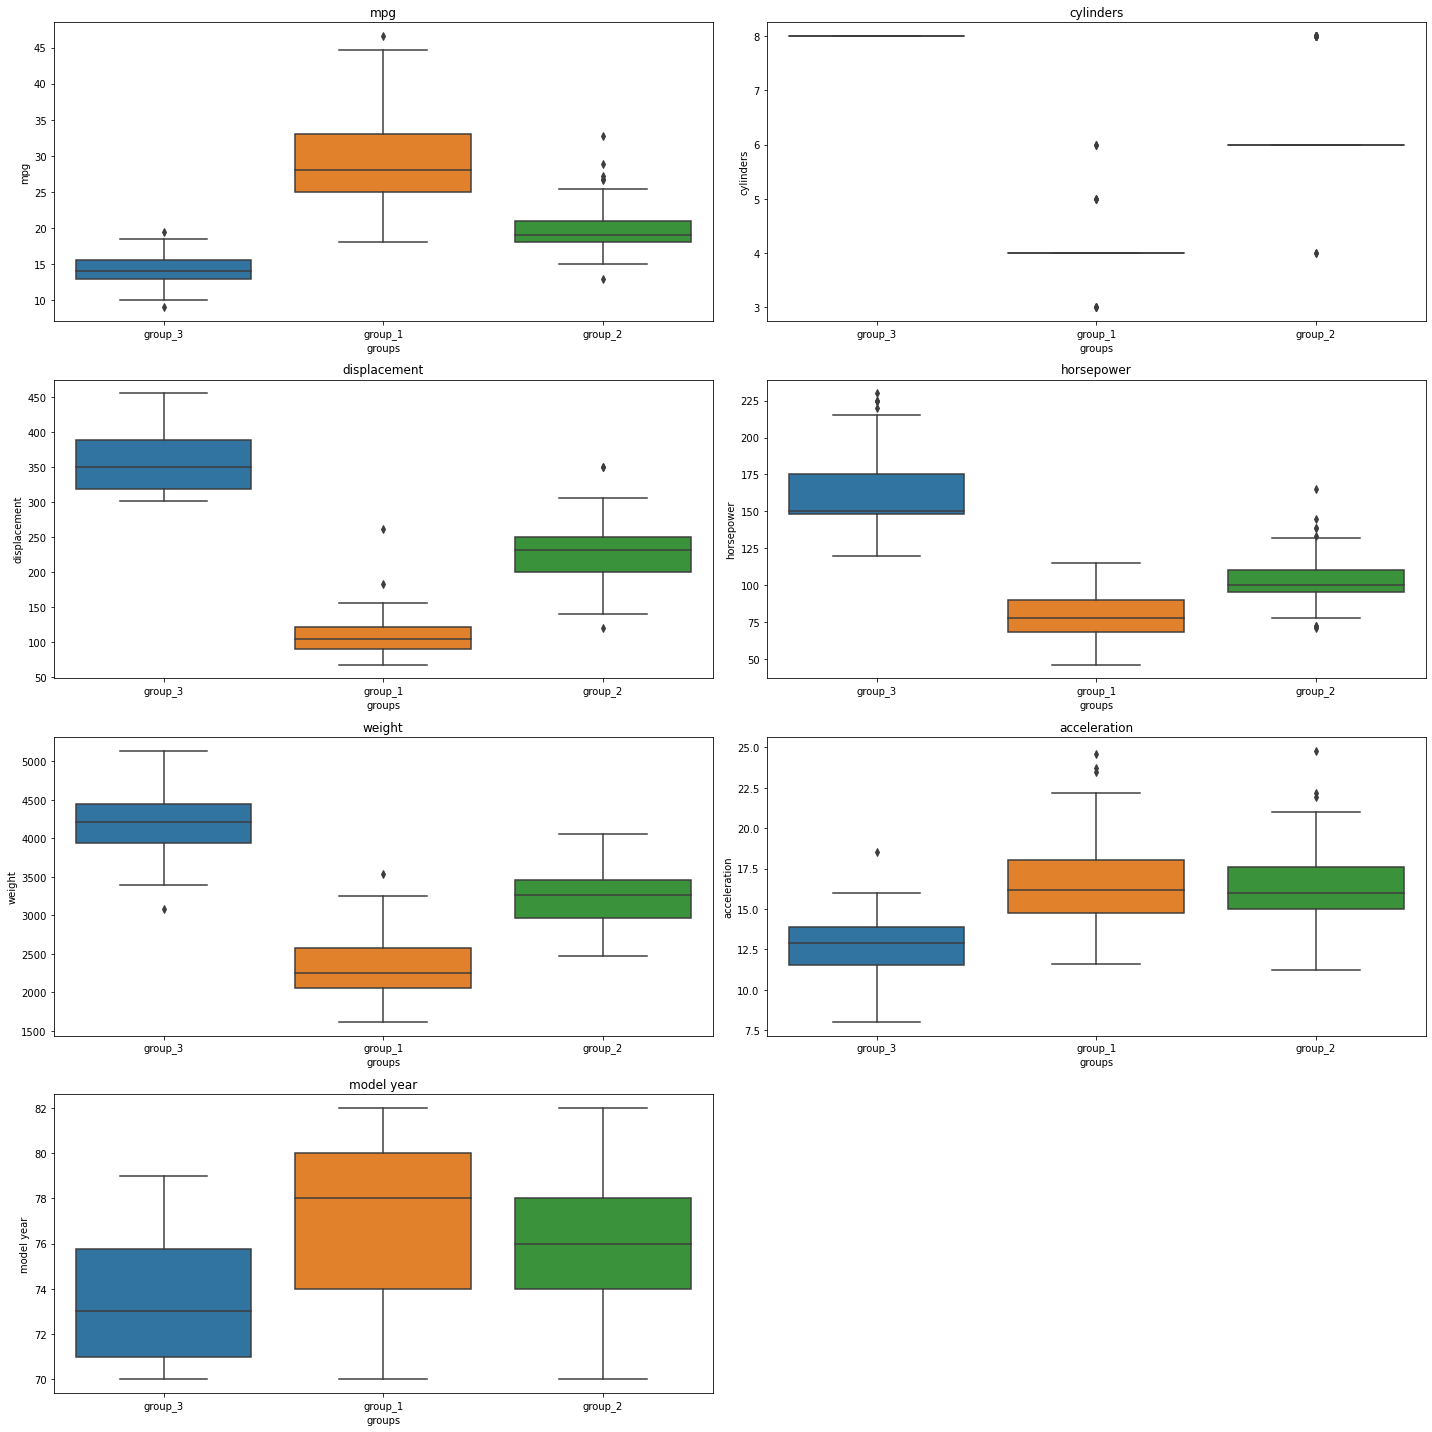

In [36]:
all_col = data.columns.tolist()
plt.figure(figsize = (20, 20))
for i, variable in enumerate(all_col): 
    if i == 7:
        break   
    plt.subplot(4, 2, i + 1)   
    sns.boxplot(x='groups', y=variable, data=data)      # Creating the boxplot with groups on the x-axis and variable on the y-axis (use the DataFrame 'data')   
    plt.tight_layout() 
    plt.title(variable)
plt.show()

**Observations:**
1.There are three groups in the data, and each group represent different features.
2.While most of the cars in group 1 contains higher mpg and accelaration, they have lower displacement, horsepower, and weight.
3.Group 2 mostly include the cars with mid-category features.
4.Group 3 includes large number of old cars with lower accelaration, higher weight, displacement, and horsepower.